In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\emman\\kaggle datasets\\kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#Kyhposis dataset represents a number of patients with kyphosis(spine conditions) who had an operation, and the datasets shows if kyphosis was present or absent in every patient. Age is age of person in months(children's age), Number is number of vetebrae involved in the operation, Start is the number of topmost vetebrae that was operated on.

# Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


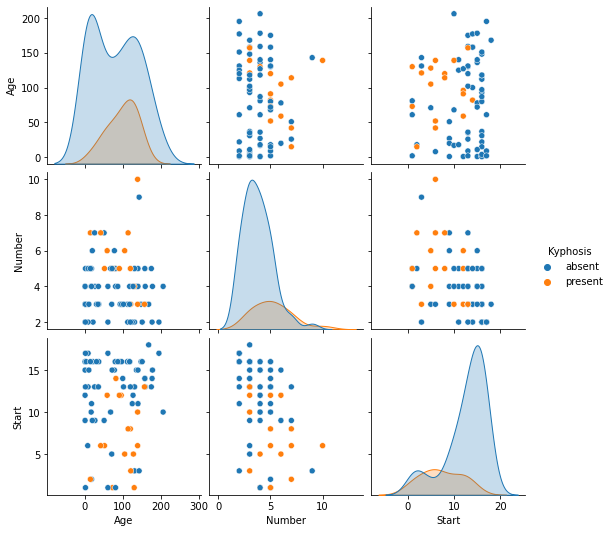

In [5]:
sns.pairplot(data=df,hue='Kyphosis')

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



[[13  4]
 [ 6  2]]


#Let's see how the above results compare to a random forest model. Random forest outshines a decision tree

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=200)

In [104]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [105]:
rfc_pred = rfc.predict(X_test)

In [106]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



[[17  0]
 [ 6  2]]


In [71]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Project Exercise and Solutions

#Project involves if a loan that was taken from lendingclub.com was fully paid back or not

In [107]:
loans = pd.read_csv("C:\\Users\\emman\\kaggle datasets\\loan_data.csv")

In [108]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [109]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [114]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [117]:
loans['credit.policy'].value_counts()         #to check how many credit policy there is

1    7710
0    1868
Name: credit.policy, dtype: int64

# Exploraroty Data Analysis

#1. Create a histogram of two FICO distributions on top of each other,one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

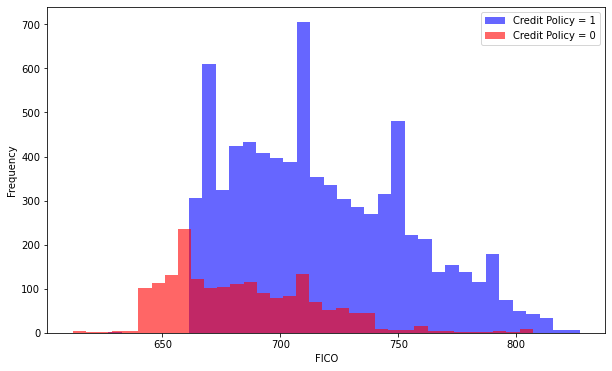

In [122]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].plot.hist(bins=35,color='blue',label='Credit Policy = 1',alpha=0.6)
loans[loans['credit.policy']==0]['fico'].plot.hist(bins=35,color='red',label='Credit Policy = 0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')

#From the above plot, based on the FICO score, credit policy = 1 has more people than credit policy = 0. credit plicy = 1 indicates if the customer meets lending criteria of lending.com, and 0 if customers do not meet criteria.

#2. Create a similar figure, except this time select by the not.fully.paid column

In [124]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

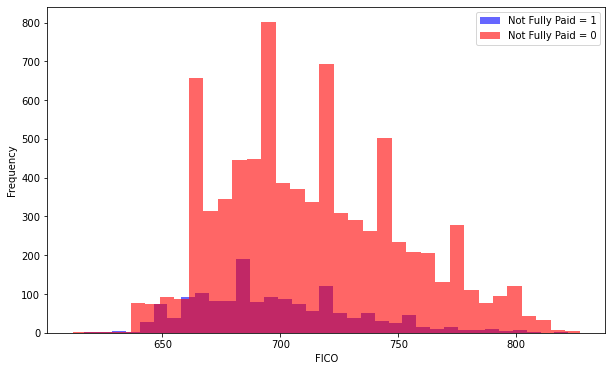

In [126]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].plot.hist(bins=35,color='blue',label='Not Fully Paid = 1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].plot.hist(bins=35,color='red',label='Not Fully Paid = 0',alpha=0.6)
plt.legend()
plt.xlabel('FICO')

#3. Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid

In [132]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

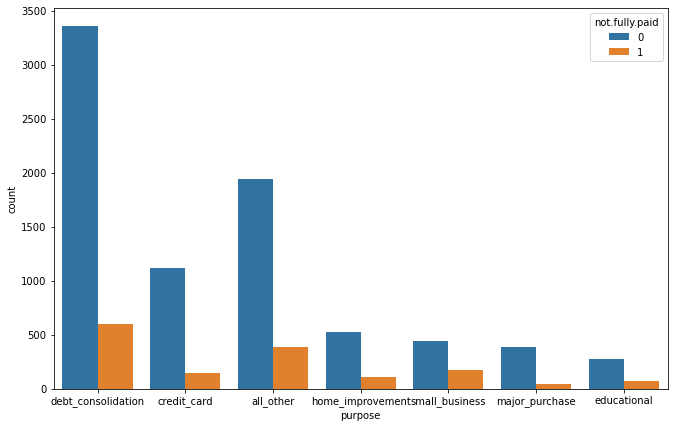

In [131]:
plt.figure(figsize=(11,7))
sns.countplot(data=loans,x='purpose',hue='not.fully.paid')

#Lets see the trend between FICO score and interest rate. Recreate a joint plot. An increase in fico score causes a decrease in interest rate.

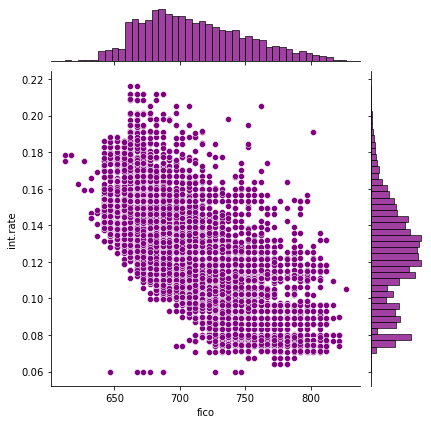

In [138]:
sns.jointplot(data=loans,x='fico',y='int.rate',color='purple')

#create the following lmplots to see if the trend differed btwn not.fully.paid and credit.policy.

<Figure size 792x504 with 0 Axes>

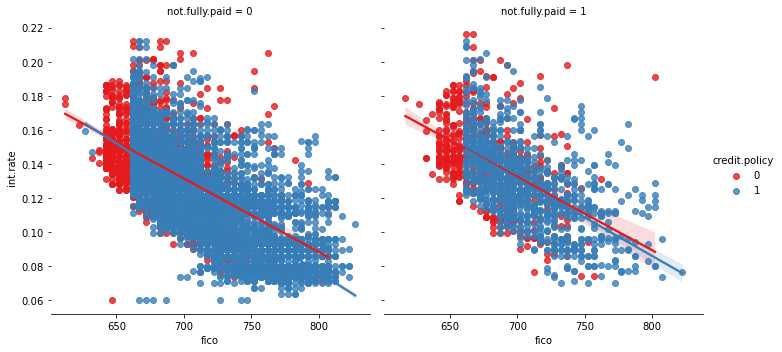

In [143]:
plt.figure(figsize=(11,7))
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette='Set1')
sns.despine(left=True)

# Setting up the Data

#Check loans.info() again

In [144]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#Since there is a categotical column 'purpose',it needs to be transformed so sklearn will be able to understand. Create a list of 1 element containing string 'purpose'. call the list cat_feats

In [156]:
cat_feats = ['purpose']

#use pd.get_dummies to create a larget dataframe that has new feature columns with dummy variables, set as final_data.

In [157]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [158]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [159]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#Train, test and split your data with sklean into training set and testing set

In [161]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Train a decision Tree model by import Decision Tree Classifier. Instantiate with dtree and fit the training data

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dtree = DecisionTreeClassifier()

In [168]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation of the Decision Tree

#Create predictions from the test data and create confusion matrix and classification report.

In [169]:
predi = dtree.predict(X_test)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print(classification_report(y_test,predi))
print('\n')
print(confusion_matrix(y_test,predi))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.74      0.75      2874



[[2009  422]
 [ 335  108]]


# Prediction and Evaluation of the Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
RFC = RandomForestClassifier(n_estimators=300)

In [182]:
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [185]:
pred = RFC.predict(X_test)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



[[2424    7]
 [ 434    9]]


#From the above models, it's difficult to tell which did better on individual basis. The recall of class 1 on random forest is less than class 1 of decision tree, but overall the accuracy of random forest is more than that of decision tree. So, it depends on the business people to decide which model is better.